In [1]:
# 패키지 임포트
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler # 스케일링 관련 패키지
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # 범주화 및 더미변수화

In [3]:
# 실습 데이터 불러오기
df = pd.read_csv('C:\\Users\\wai\\Desktop\\프로젝트\\교육자료\\교육데이터\\kaggle\\test.csv')
print(df)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110    Male   25                1         11.0                   1   
1       381111    Male   40                1         28.0                   0   
2       381112    Male   47                1         28.0                   0   
3       381113    Male   24                1         27.0                   1   
4       381114    Male   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142  Female   26                1         37.0                   1   
127033  508143  Female   38                1         28.0                   0   
127034  508144    Male   21                1         46.0                   1   
127035  508145    Male   71                1         28.0                   1   
127036  508146    Male   41                1         29.0                   1   

       Vehicle_Age Vehicle_

In [26]:
### 'Age' 나이 변수 범주화 및 더미변수화 ###
### 실습 1) 'Age' 나이 변수 범주화 하기

# 나이대 라벨링 리스트 선언
labels = []
# 구간 개수 : 9
diff_n = 9
for x in range(10, diff_n*10+10, 10):
    print(x)
    labels.append(str(x) + '대')
print(labels) # 구간 개수에 따라 나이대를 라벨링

# 데이터 프레임에 'Age_grade'  나이대 그룹핑(10개의 구간을 일정한 구간의 크기로 구분함)
df['Age_grade'] = pd.cut(df.loc[:,'Age'], bins=diff_n, labels=labels)
print(df['Age_grade'] )

# 데이터 프레임에 'Age_grade_quantile' 나이대 그룹핑(9개의 구간을 일정한 분위수로 구분함)
# 변수의 변량에 따라서 분위수를 나누는 구간이 중복가능하기 때문에 duplicates 옵션에 'drop'을 해준다.
# labels=False 옵션을 주어 낮은 구간부터 높은 구간순으로 0,1,..6  +1씩 값이 증가하는 구간으로 세팅된다.
df['Age_grade_quantile'] = pd.qcut(df.loc[:,'Age'], q=diff_n, duplicates='drop', labels=False) # 7개의 구간으로 나누어졌다.
# 0 등급부터 라벨링이 되기때문에 'v1_grade_quantile' 컬럼에 전체 적으로 +1을 해준다.
df['Age_grade_quantile'] = df['Age_grade_quantile'] + 1
print(df['Age_grade_quantile'])


10
20
30
40
50
60
70
80
90
['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대']
0         10대
1         30대
2         40대
3         10대
4         10대
         ... 
127032    10대
127033    30대
127034    10대
127035    80대
127036    30대
Name: Age_grade, Length: 127037, dtype: category
Categories (9, object): [10대 < 20대 < 30대 < 40대 ... 60대 < 70대 < 80대 < 90대]
0         3
1         5
2         7
3         2
4         4
         ..
127032    3
127033    5
127034    1
127035    9
127036    6
Name: Age_grade_quantile, Length: 127037, dtype: int64


In [17]:
### 실습 2) 'Age_grade'(범주형 변수) 더미 변수화 하기
# unique 값 확인 ['10대', '30대', '40대', '50대', '70대', '20대', '60대', '80대', '90대']
print(df.loc[:,'Age_grade'].unique())

# 범주형 데이터는 모델의 학습 변수로 사용할 수 없다. 그래서 더미 변수화를 해주여야 사용할 수 있게 된다.
dummies_df = pd.get_dummies(df.loc[:,'Age_grade']) # 더미 변수를 생성
# 더미 변수명 변경 => 'Age_1' ~ 'Age_9' 까지
dummies_df.columns = list(map(lambda x : 'Age_' + x.replace('0대',''), list(dummies_df.columns)))
result_df = pd.concat([df, dummies_df], axis=1) # 생성된 더미 변수를 원 데이터 옆에 붙여준다.
print(result_df) # 원 데이터 뒤에 프레임 뒤에 더미 변수가 생성된 것을 확인

[10대, 30대, 40대, 50대, 70대, 20대, 60대, 80대, 90대]
Categories (9, object): [10대 < 20대 < 30대 < 40대 ... 60대 < 70대 < 80대 < 90대]
CategoricalIndex(['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대',
                  '90대'],
                 categories=['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', ...], ordered=True, dtype='category')
            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110    Male   25                1         11.0                   1   
1       381111    Male   40                1         28.0                   0   
2       381112    Male   47                1         28.0                   0   
3       381113    Male   24                1         27.0                   1   
4       381114    Male   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142  Female   26                1         37.0                   1   
127033  5

In [25]:
### 실습 3) sklearn의 LabelEncoder, OneHotEncoder 함수로 더미 변수화 하기
le = LabelEncoder()
labels = le.fit_transform(df.loc[:,'Age_grade']) # 데이터 변량에 따른 라벨링
lb_matrix = labels.reshape(-1, 1) # 2차원 행렬로 변환
print('나이대 데이터 행렬 :', lb_matrix)
print('나이대 데이터 행렬 사이즈 :', lb_matrix.shape)
print('나이대 데이터 변량 unique :', le.classes_)

# 실습3) 원핫인코더로 더미 변수 생성
ohe = OneHotEncoder(sparse=False)
ohe_matrix = ohe.fit_transform(lb_matrix)
list(le.classes_)
# 행렬을 변수화
dummies_df_2 = pd.DataFrame(data=ohe_matrix, columns=le.classes_) # 데이터 프레임화
# 더미 변수명 변경 => 'Age_1' ~ 'Age_9' 까지
dummies_df_2.columns = list(map(lambda x : 'Age_' + x.replace('0대',''), list(dummies_df_2.columns)))
result_df = pd.concat([df, dummies_df_2], axis=1) # 생성된 더미 변수를 원 데이터 옆에 붙여준다.
print(result_df)

나이대 데이터 행렬 : [[0]
 [2]
 [3]
 ...
 [0]
 [7]
 [2]]
나이대 데이터 행렬 사이즈 : (127037, 1)
나이대 데이터 변량 unique : ['10대' '20대' '30대' '40대' '50대' '60대' '70대' '80대' '90대']
            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110    Male   25                1         11.0                   1   
1       381111    Male   40                1         28.0                   0   
2       381112    Male   47                1         28.0                   0   
3       381113    Male   24                1         27.0                   1   
4       381114    Male   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142  Female   26                1         37.0                   1   
127033  508143  Female   38                1         28.0                   0   
127034  508144    Male   21                1         46.0                   1   
127035  508145    Male   71         

Annual_Premium 데이터 :  0         35786.0
1         33762.0
2         40050.0
3         37356.0
4         59097.0
           ...   
127032    30867.0
127033    28700.0
127034    29802.0
127035    62875.0
127036    27927.0
Name: Annual_Premium, Length: 127037, dtype: float64
최소 : 2630.0 , 최대 : 472042.0


Text(0.5, 1.0, 'Annual_Premium RAW DATA')

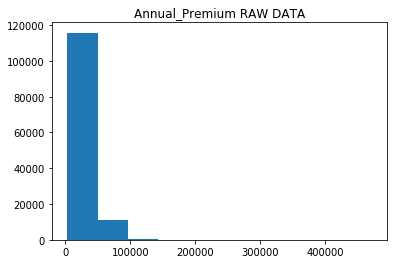

In [82]:
##'Annual_Premium' 변수 Scaling 하기 ###

# 'Annual_Premium' 데이터 최대 및 최소값 확인
print('Annual_Premium 데이터 : ', df.loc[:,'Annual_Premium'])
var_array = np.array(df.loc[:,'Annual_Premium'])

# 히스토그램 : X축은 변량, Y축은 빈도수
print('최소 :', var_array.min(), ', 최대 :', var_array.max())
plt.hist(var_array)
plt.title('Annual_Premium RAW DATA')

스케일러 객체 : StandardScaler(copy=True, with_mean=True, with_std=True)
[[35786.]
 [33762.]
 [40050.]
 ...
 [29802.]
 [62875.]
 [27927.]]
StandardScaling :  [[ 0.31049188]
 [ 0.19104824]
 [ 0.56212611]
 ...
 [-0.04264584]
 [ 1.90911281]
 [-0.15329644]]
최소 : -1.6461649032349563 , 최대 : 26.05555343721326


Text(0.5, 1.0, 'Annual_Premium Standard Scaling')

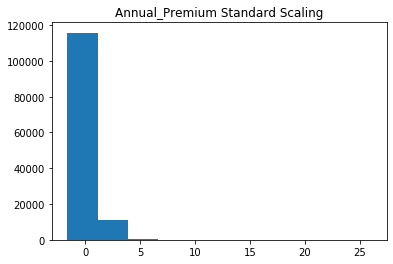

In [79]:
# 1. StandardScaler : 평균을 0, 분산 1인 데이터로 변경합니다.

standardscaler = StandardScaler() # 스케일러 객체 할당
print('스케일러 객체 :', standardscaler) 

# 스케일링을 하기위해 2차원 행렬로 변환
scale_array = var_array.reshape(-1,1)
print(scale_array)
# StandardScaler 스케일링
std_scaling = standardscaler.fit_transform(scale_array)
print('StandardScaling : ', std_scaling)

# 히스토그램 : Standard Scalling
print('최소 :', std_scaling.min(), ', 최대 :', std_scaling.max())
plt.hist(std_scaling)
plt.title('Annual_Premium Standard Scaling')

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.07063305]
 [0.06632127]
 [0.07971675]
 ...
 [0.05788518]
 [0.12834141]
 [0.05389083]]
최소 : 0.0 , 최대 : 0.9999999999999999


Text(0.5, 1.0, 'Annual_Premium MinMax Scaling')

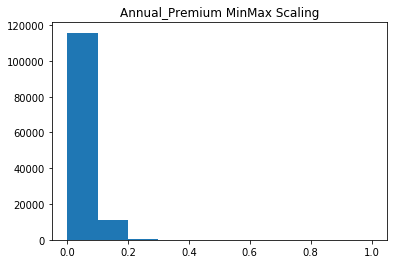

In [80]:
# 2. MinmaxScaler : 모든 데이터 값이 0과 1사이의 값들로 매핑됩니다.
minmaxscaler= MinMaxScaler()
print(minmaxscaler) # 스케일러 객체

# StandardScaler 스케일링
mms_scaling = minmaxscaler.fit_transform(scale_array)
print('MinMaxScaling : ', mms_scaling)

# 히스토그램 : MinMax Scalling
print('최소 :', mms_scaling.min(), ', 최대 :', mms_scaling.max())
plt.hist(mms_scaling)
plt.title('Annual_Premium MinMax Scaling')

MinMaxScaler(copy=True, feature_range=(0, 1))
MaxAbsScaling :  [[0.07063305]
 [0.06632127]
 [0.07971675]
 ...
 [0.05788518]
 [0.12834141]
 [0.05389083]]
최소 : 0.0 , 최대 : 0.9999999999999999


Text(0.5, 1.0, 'Annual_Premium MaxAbsScaling Scaling')

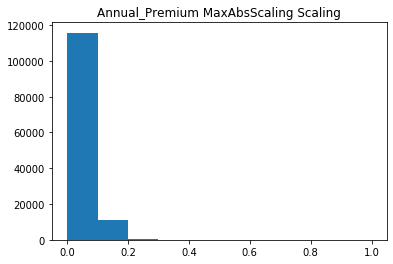

In [81]:
# 3. MaxAbsScaler : 절대값이 0~1사이에 매핑되도록 합니다. 즉 -1~1 사이로 재조정됩니다..
minabsscaler= MaxAbsScaler()
print(minmaxscaler) # 스케일러 객체

# MaxAbsScaler 스케일링
mabs = minabsscaler.fit_transform(scale_array)
print('MaxAbsScaling : ', mms_scaling)
print('최소 :', mms_scaling.min(), ', 최대 :', mms_scaling.max())
# 히스토그램으로 표현(스케일링한 데이터 분포) => 모든 데이터 값이 양수이기 때문에 스케일링된 값이 음수일 수가 없습니다.
plt.hist(mms_scaling)
plt.title('Annual_Premium MaxAbsScaling Scaling')